In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pandas.io.json import json_normalize
from wordcloud import WordCloud, STOPWORDS

D:\anaconda\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [174]:
data1 = pd.read_csv('transcript_data.csv')
data2 = pd.read_csv('talk_data.csv')
data3 = pd.read_csv('speaker_data.csv')
data2.columns.values[2] = "title"
data3.columns.values[0] = "title"

In [175]:
data1=pd.DataFrame(data1)
data2=pd.DataFrame(data2)
data3=pd.DataFrame(data3)

In [176]:
data1=data1.drop_duplicates()
data1=data1.dropna()

data2=data2.dropna()

data3=data3.drop_duplicates('title')

In [140]:
data1

,title,transcript
0,Can you outsmart the apples and oranges fallacy?,Baking apple pie? Discount orange warehouse ha...
1,The exploitation of US college athletes,"In college sports, American universities are e..."
2,How does ultrasound work?,"In a pitch-black cave, bats can’t see much. Bu..."
3,"An honest history of an ancient and ""nasty"" word","First, a warning. As far as offensive words go..."
4,The electrical blueprints that orchestrate life,"Chris Anderson: Mike, welcome. It's good to se..."
...,...,...
4437,The best stats you've ever seen,"About 10 years ago, I took on the task to teac..."
4438,Do schools kill creativity?,Good morning. How are you?(Audience) Good.It's...
4439,Greening the ghetto,If you're here today — and I'm very happy that...
4440,Simplicity sells,"(Music: ""The Sound of Silence,"" Simon &amp; Ga..."


In [94]:
data3[data3.duplicated('title')]

,title,speaker,speaker_title,speaker_occ,speaker_bio


In [95]:
data3=data3.drop(["speaker_title"], axis = 1)


In [30]:
data3

,title,speaker,speaker_occ,speaker_bio
0,Can you outsmart the apples and oranges fallacy?,Elizabeth Cox,NaN,NaN
1,The exploitation of US college athletes,Tim Nevius,College sports lawyer,Tim Nevius is a leading sports lawyer and coll...
2,How does ultrasound work?,Jacques Abramowicz,NaN,NaN
3,"An honest history of an ancient and ""nasty"" word",Kate Lister,Sex historian,Kate Lister is a sex historian and lecturers a...
4,The electrical blueprints that orchestrate life,Michael Levin,Bioelectric explorer,Michael Levin's research could give rise to ad...
...,...,...,...,...
4437,The best stats you've ever seen,Hans Rosling,Global health expert; data visionary,"In Hans Rosling’s hands, data sings. Global tr..."
4438,Do schools kill creativity?,Sir Ken Robinson,"Author, educator",Creativity expert Sir Ken Robinson challenged ...
4439,Greening the ghetto,Majora Carter,Activist for environmental justice,Majora Carter redefined the field of environme...
4440,Simplicity sells,David Pogue,Technology columnist,David Pogue is the personal technology columni...


In [177]:
data1.at[705,'title']="Ugly History 1"
data1.at[837,'title']="Ugly History 2"
data1.at[2886,'title']="If superpowers were real 1"
data1.at[2887,'title']="If superpowers were real 2"
data1.at[2888,'title']="If superpowers were real 3"
data1.at[2889,'title']="If superpowers were real 4"
data1.at[4061,'title']="My wish 1"
data1.at[4240,'title']="My wish 2"
data1.at[4241,'title']="My wish 3"
data1.at[4242,'title']="My wish 4"
data1.at[4378,'title']="My wish 5"
data1.at[4379,'title']="My wish 6"
data1.at[4380,'title']="My wish 7"
data1.at[4401,'title']="My wish 8"
data1.at[4402,'title']="My wish 9"
data1.at[4403,'title']="My wish 10"
data1.at[4430,'title']="My wish 11"
data1.at[4431,'title']="My wish 12"
data1.at[4432,'title']="My wish 13"
data1.at[4100,'title']="Demo 1"

In [158]:
data2[data2.duplicated('title')]

,talk_desc,event,title,views,duration,tags,recorded_at,published on


In [97]:
data2.at[688,'title']="Ugly History 1"
data2.at[818,'title']="Ugly History 2"
data2.at[2810,'title']="If superpowers were real 1"
data2.at[2811,'title']="If superpowers were real 2"
data2.at[2812,'title']="If superpowers were real 3"
data2.at[2813,'title']="If superpowers were real 4"
data2.at[2814,'title']="If superpowers were real 5"
data2.at[3503,'title']="My wish 1"
data2.at[3952,'title']="My wish 2"
data2.at[4128,'title']="My wish 3"
data2.at[4129,'title']="My wish 4"
data2.at[4261,'title']="My wish 5"
data2.at[4262,'title']="My wish 6"
data2.at[4263,'title']="My wish 7"
data2.at[4283,'title']="My wish 8"
data2.at[4284,'title']="My wish 9"
data2.at[4285,'title']="My wish 10"
data2.at[4310,'title']="My wish 11"
data2.at[4311,'title']="My wish 12"
data2.at[4312,'title']="My wish 13"
data2.at[3991,'title']="Demo 1"

In [33]:
data3[data3.duplicated('title')]

,title,speaker,speaker_occ,speaker_bio


In [137]:
output1.loc[0:20,:]

,title,transcript,talk_desc,event,views,duration,tags,recorded_at,published on
0,Can you outsmart the apples and oranges fallacy?,"Baking apple pie? Discount orange warehouse has you covered! A fruit’s a fruit, right?It’s 1988, and scientist James Hansen has just testified to the United States Congress that global warming t...",It's 1997. The United States Senate has called a hearing about global warming. Some expert witnesses point out that past periods in Earth's history were warmer than the 20th century. Because such ...,TED-Ed,119359,327,"['education', 'psychology', 'animation', 'TED-Ed', 'brain', 'climate change']",2021-04-05T00:00:00.000+00:00,1617636753
1,The exploitation of US college athletes,"In college sports, American universities are exploiting, disproportionately, Black athletes for billions of dollars, while diminishing their education, health and safety. Let me start with a bit o...","Colleges and universities in the US make billions of dollars each year from sports, compromising the health and education of athletes -- who are disproportionately Black -- in the name of money, p...",TEDxDayton,438573,611,"['sports', 'law', 'education', 'United States', 'race', 'policy', 'TEDx']",2020-11-10T00:00:00.000+00:00,1617634131
2,How does ultrasound work?,"In a pitch-black cave, bats can’t see much. But even with their eyes shut, they can navigate rocky topography at incredible speeds. This is because a bat’s flight isn’t just guided by its eyes, b...","In a dark cave, bats can't see much. But even with their eyes shut, they can navigate rocky topography at incredible speeds. This is because bats aren't just guided by their eyes, but rather, by t...",TED-Ed,140874,295,"['education', 'technology', 'animation', 'TED-Ed', 'invention', 'medicine', 'health care', 'medical imaging', 'science', 'pregnancy', 'innovation', 'health', 'biology', 'healthcare', 'sound']",2021-04-01T00:00:00.000+00:00,1617290223
3,"An honest history of an ancient and ""nasty"" word","First, a warning. As far as offensive words go, you are now entering a hard-hat area. We're going to be unabashed in this, I am talking to you about a very particular word, a very powerful word, a...","With candor and cunning, sex historian Kate Lister chronicles the curious journey of an ancient, honest word with innocent origins and a now-scandalous connotation in this uproarious love letter t...",TEDxUniversityofGlasgow,569477,1148,"['sex', 'language', 'ancient world', 'history', 'society', 'TEDx', 'humor']",2020-03-06T00:00:00.000+00:00,1617289565
4,The electrical blueprints that orchestrate life,"Chris Anderson: Mike, welcome. It's good to see you. I'm excited for this conversation.Michael Levin: Thank you so much. I'm so happy to be here.CA: So, most of us have this mental model in biolog...","DNA isn't the only builder in the biological world -- there's also a mysterious bioelectric layer directing cells to work together to grow organs, systems and bodies, says biologist Michael Levin....",TED2020,122682,1176,"['biology', 'science', 'invention', 'robots', 'DNA', 'technology', 'nature', 'innovation', 'future', 'engineering']",2020-05-18T00:00:00.000+00:00,1617213773
5,Language around gender and identity evolves (and always has),I am a linguist. Linguists study language. And we do this in a lot of different ways. Some linguists study how we pronounce certain sounds. Others look at how we build sentences. And some study ho...,"Dictionaries and grammar ""rules"" don't have the final word on language -- and believing they do can harm more than help, especially for the trans community. Sociolinguist Archie Crowley deconstruc...",TEDxUofSC,562325,794,"['language', 'LGBT', 'history', 'Transgender', 'communication', 'TEDx', 'identity', 'social change']",2020-10-21T00:00:00.000+00:00,1617203258
6,A brief history of the devil,"Satan, the beast crunching sinners’ bones in his subterranean lair. Lucifer, the fallen angel raging against the established order. Mephistopheles, the

In [98]:
# using merge function by setting how='inner'
output1 = pd.merge(data1, data2, 
                   on='title', 
                   how='inner')
  
# displaying result
print(output1)

# using merge function by setting how='left'
output = pd.merge(output1, data3, 
                   on='title', 
                   how='left')
  
# displaying result
print(output)

                                                 title  \
0     Can you outsmart the apples and oranges fallacy?   
1              The exploitation of US college athletes   
2                            How does ultrasound work?   
3     An honest history of an ancient and "nasty" word   
4      The electrical blueprints that orchestrate life   
...                                                ...   
4166                   The best stats you've ever seen   
4167                       Do schools kill creativity?   
4168                               Greening the ghetto   
4169                                  Simplicity sells   
4170                       Averting the climate crisis   

                                             transcript  \
0     Baking apple pie? Discount orange warehouse ha...   
1     In college sports, American universities are e...   
2     In a pitch-black cave, bats can’t see much. Bu...   
3     First, a warning. As far as offensive words go...   
4     Ch

In [99]:
output

,title,transcript,talk_desc,event,views,duration,tags,recorded_at,published on,speaker,speaker_occ,speaker_bio
0,Can you outsmart the apples and oranges fallacy?,Baking apple pie? Discount orange warehouse ha...,It's 1997. The United States Senate has called...,TED-Ed,119359,327,"['education', 'psychology', 'animation', 'TED-...",2021-04-05T00:00:00.000+00:00,1617636753,Elizabeth Cox,NaN,NaN
1,The exploitation of US college athletes,"In college sports, American universities are e...",Colleges and universities in the US make billi...,TEDxDayton,438573,611,"['sports', 'law', 'education', 'United States'...",2020-11-10T00:00:00.000+00:00,1617634131,Tim Nevius,College sports lawyer,Tim Nevius is a leading sports lawyer and coll...
2,How does ultrasound work?,"In a pitch-black cave, bats can’t see much. Bu...","In a dark cave, bats can't see much. But even ...",TED-Ed,140874,295,"['education', 'technology', 'animation', 'TED-...",2021-04-01T00:00:00.000+00:00,1617290223,Jacques Abramowicz,NaN,NaN
3,"An honest history of an ancient and ""nasty"" word","First, a warning. As far as offensive words go...","With candor and cunning, sex historian Kate Li...",TEDxUniversityofGlasgow,569477,1148,"['sex', 'language', 'ancient world', 'history'...",2020-03-06T00:00:00.000+00:00,1617289565,Kate Lister,Sex historian,Kate Lister is a sex historian and lecturers a...
4,The electrical blueprints that orchestrate life,"Chris Anderson: Mike, welcome. It's good to se...",DNA isn't the only builder in the biological w...,TED2020,122682,1176,"['biology', 'science', 'invention', 'robots', ...",2020-05-18T00:00:00.000+00:00,1617213773,Michael Levin,Bioelectric explorer,Michael Levin's research could give rise to ad...
...,...,...,...,...,...,...,...,...,...,...,...,...
4166,The best stats you've ever seen,"About 10 years ago, I took on the task to teac...",You've never seen data presented like this. Wi...,TED2006,14986826,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...",2006-02-22T00:00:00.000+00:00,1151440680,Hans Rosling,Global health expert; data visionary,"In Hans Rosling’s hands, data sings. Global tr..."
4167,Do schools kill creativity?,Good morning. How are you?(Audience) Good.It's...,Sir Ken Robinson makes an entertaining and pro...,TED2006,70176973,1164,"['children', 'creativity', 'culture', 'dance',...",2006-02-25T00:00:00.000+00:00,1151367060,Sir Ken Robinson,"Author, educator",Creativity expert Sir Ken Robinson challenged ...
4168,Greening the ghetto,If you're here today — and I'm very happy that...,"In an emotionally charged talk, MacArthur-winn...",TED2006,2849888,1116,"['MacArthur grant', 'activism', 'business', 'c...",2006-02-26T00:00:00.000+00:00,1151367060,Majora Carter,Activist for environmental justice,Majora Carter redefined the field of environme...
4169,Simplicity sells,"(Music: ""The Sound of Silence,"" Simon &amp; Ga...",New York Times columnist David Pogue takes aim...,TED2006,1973959,1286,"['computers', 'entertainment', 'interface desi...",2006-02-24T00:00:00.000+00:00,1151367060,David Pogue,Technology columnist,David Pogue is the personal technology columni...


In [100]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [101]:
output.columns

Index(['title', 'transcript', 'talk_desc', 'event', 'views', 'duration',
       'tags', 'recorded_at', 'published on', 'speaker', 'speaker_occ',
       'speaker_bio'],
      dtype='object')

In [102]:
output = output[['title', 'transcript', 'talk_desc', 'event', 'views', 'duration',
       'tags', 'recorded_at', 'published on', 'speaker', 'speaker_occ',
       'speaker_bio']]

In [103]:
df=output

In [104]:
import datetime
df['recorded_at'] = pd.to_datetime(df['recorded_at'])
df['recorded_at'] =df['recorded_at'].dt.date
df['recorded_at']

0       2021-04-05
1       2020-11-10
2       2021-04-01
3       2020-03-06
4       2020-05-18
           ...    
4166    2006-02-22
4167    2006-02-25
4168    2006-02-26
4169    2006-02-24
4170    2006-02-25
Name: recorded_at, Length: 4171, dtype: object

In [47]:
len(df)

4171

In [49]:
#the 15 most viewed TED talks of all time
pop_talks = df[['title', 'speaker', 'views', 'recorded_at']].sort_values('views', ascending=False)[:15]
pop_talks

,title,speaker,views,recorded_at
4167,Do schools kill creativity?,Sir Ken Robinson,70176973,2006-02-25
2036,This is what happens when you reply to spam email,James Veitch,63683410,2015-12-08
2938,Your body language may shape who you are,Amy Cuddy,61030600,2012-06-26
3563,How great leaders inspire action,Simon Sinek,54351663,2009-09-17
3418,The power of vulnerability,Brené Brown,52871680,2010-06-06
1984,Inside the mind of a master procrastinator,Tim Urban,49876247,2016-02-16
2426,How to speak so that people want to listen,Julian Treasure,45961304,2013-06-10
2225,The next outbreak? We're not ready,Bill Gates,40591593,2015-03-18
1362,My philosophy for a happy life,Sam Berns,40315294,2013-10-25
2041,What makes a good life? Lessons from the longe...,Robert Waldinger,37902552,2015-11-14


<AxesSubplot:xlabel='speakers', ylabel='views'>

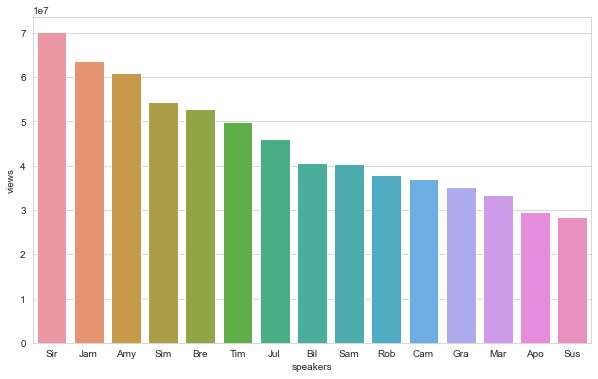

In [55]:
#a bar chart to visualise these 15 talks in terms of the number of views they garnered
pop_talks['speakers'] = pop_talks['speaker'].apply(lambda x: x[:3])
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(x='speakers', y='views', data=pop_talks)

C:\Users\MIT\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='views', ylabel='Density'>

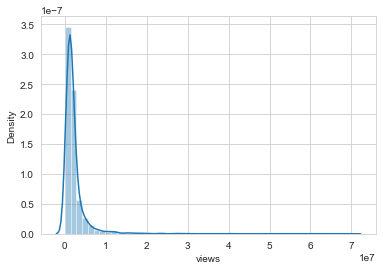

In [56]:
sns.distplot(df['views'])

C:\Users\MIT\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='views', ylabel='Density'>

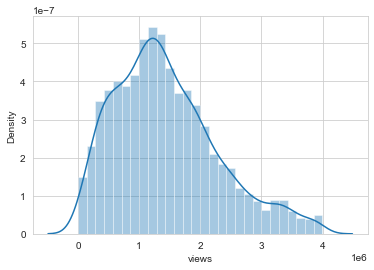

In [57]:
sns.distplot(df[df['views'] < 0.4e7]['views'])

In [58]:
df['views'].describe()

count    4.171000e+03
mean     2.245092e+06
std      3.691634e+06
min      0.000000e+00
25%      8.808585e+05
50%      1.437390e+06
75%      2.268000e+06
max      7.017697e+07
Name: views, dtype: float64

In [105]:
df['recorded_at'] = pd.to_datetime(df['recorded_at'])
df['month'] = df['recorded_at'].dt.strftime('%b')

#df['month'] = pd.DatetimeIndex(df['recorded_at']).month
month_df = pd.DataFrame(df['month'].value_counts()).reset_index()
month_df.columns = ['month', 'talks']

<AxesSubplot:xlabel='month', ylabel='talks'>

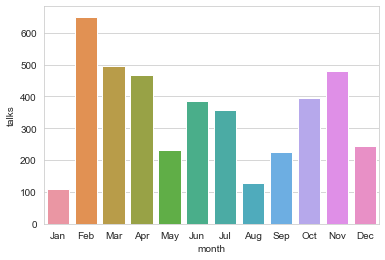

In [106]:
sns.barplot(x='month', y='talks', data=month_df, order=month_order)

In [ ]:
#February is clearly the most popular month for TED Conferences whereas August and January are the least popular. 
#February's popularity is largely due to the fact that the official TED Conferences are held in February.

In [108]:
df_x = df[df['event'].str.contains('TEDx')]
x_month_df = pd.DataFrame(df_x['month'].value_counts().reset_index())
x_month_df.columns = ['month', 'talks']

<AxesSubplot:xlabel='month', ylabel='talks'>

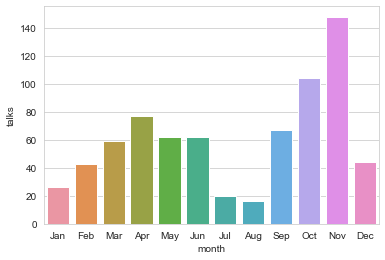

In [109]:
sns.barplot(x='month', y='talks', data=x_month_df, order=month_order)

In [ ]:
#the most popular TEDx talks take place the most in October and November.

<AxesSubplot:xlabel='year', ylabel='talks'>

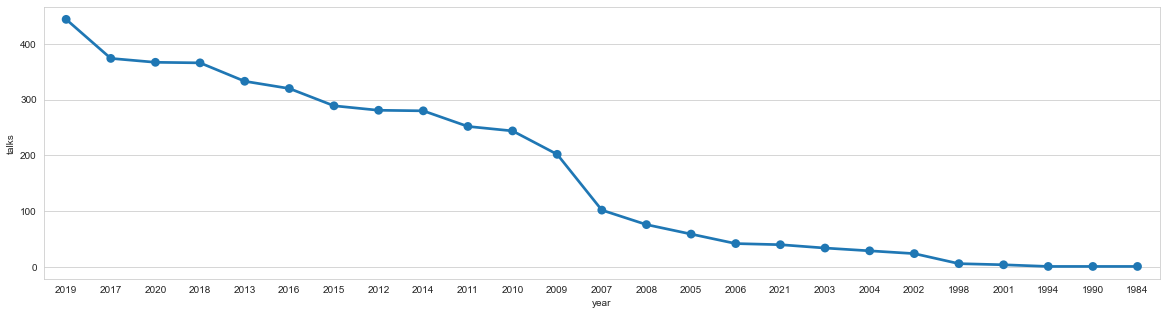

In [111]:
df['year'] = df['recorded_at'].dt.strftime('%Y')
year_df = pd.DataFrame(df['year'].value_counts().reset_index())
year_df.columns = ['year', 'talks']
plt.figure(figsize=(20,5))
sns.pointplot(x='year', y='talks', data=year_df)

In [112]:
months = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

## Speakers

In [115]:
speaker_df = df.groupby('speaker').count().reset_index()[['speaker', 'speaker_occ']]
speaker_df.columns = ['speaker', 'appearances']
speaker_df = speaker_df.sort_values('appearances', ascending=False)
speaker_df.head(10)

,speaker,appearances
1652,Juan Enriquez,10
2102,Matt Walker,9
411,Bill Gates,8
1239,Hans Rosling,8
1206,Greg Gage,8
585,Chris Anderson,7
2019,Marco Tempest,7
693,Dan Ariely,7
2966,Stewart Brand,6
16,Rives,6


In [116]:
occupation_df = df.groupby('speaker_occ').count().reset_index()[['speaker_occ', 'title']]
occupation_df.columns = ['occupation', 'appearances']
occupation_df = occupation_df.sort_values('appearances', ascending=False)

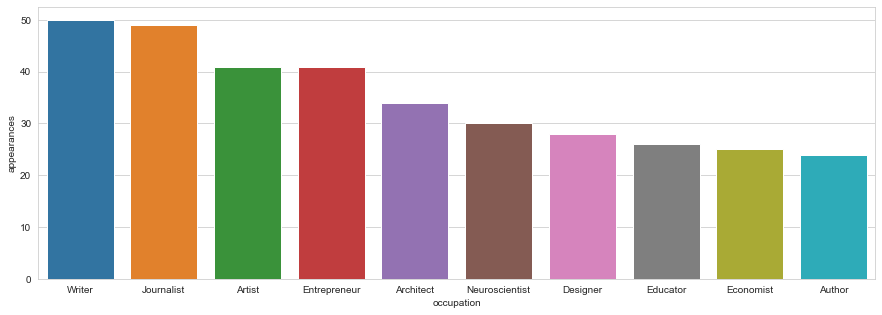

In [117]:
plt.figure(figsize=(15,5))
sns.barplot(x='occupation', y='appearances', data=occupation_df.head(10))
plt.show()

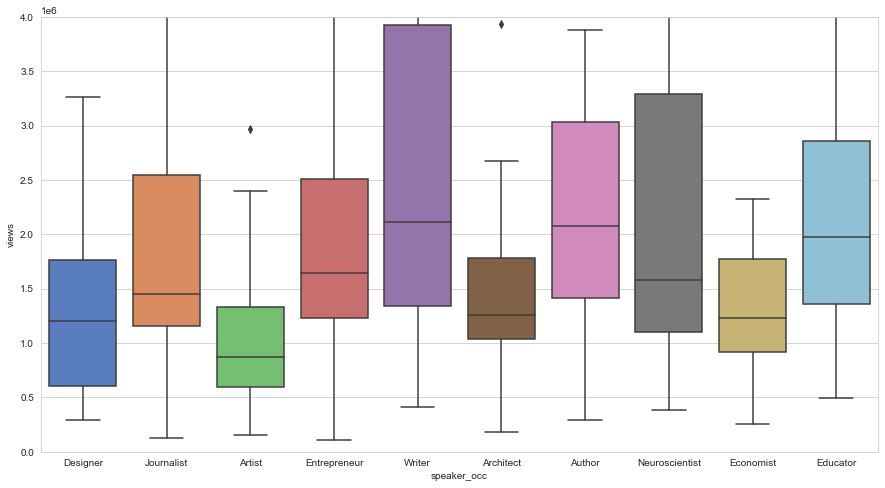

In [118]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='speaker_occ', y='views', data=df[df['speaker_occ'].isin(occupation_df.head(10)['occupation'])], palette="muted", ax =ax)
ax.set_ylim([0, 0.4e7])
plt.show()

In [119]:
events_df = df[['title', 'event']].groupby('event').count().reset_index()
events_df.columns = ['event', 'talks']
events_df = events_df.sort_values('talks', ascending=False)
events_df.head(10)

,event,talks
54,TED-Ed,659
77,TED2018,92
76,TED2017,89
78,TED2019,88
73,TED2014,77
68,TED2009,74
72,TED2013,74
75,TED2016,72
70,TED2011,69
74,TED2015,69


In [120]:
import ast
df['tags'] = df['tags'].apply(lambda x: ast.literal_eval(x))
s = df.apply(lambda x: pd.Series(x['tags']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'theme'
theme_df = df.drop('tags', axis=1).join(s)
theme_df.head()

,title,transcript,talk_desc,event,views,duration,recorded_at,published on,speaker,speaker_occ,speaker_bio,month,year,theme
0,Can you outsmart the apples and oranges fallacy?,Baking apple pie? Discount orange warehouse ha...,It's 1997. The United States Senate has called...,TED-Ed,119359,327,2021-04-05,1617636753,Elizabeth Cox,NaN,NaN,Apr,2021,education
0,Can you outsmart the apples and oranges fallacy?,Baking apple pie? Discount orange warehouse ha...,It's 1997. The United States Senate has called...,TED-Ed,119359,327,2021-04-05,1617636753,Elizabeth Cox,NaN,NaN,Apr,2021,psychology
0,Can you outsmart the apples and oranges fallacy?,Baking apple pie? Discount orange warehouse ha...,It's 1997. The United States Senate has called...,TED-Ed,119359,327,2021-04-05,1617636753,Elizabeth Cox,NaN,NaN,Apr,2021,animation
0,Can you outsmart the apples and oranges fallacy?,Baking apple pie? Discount orange warehouse ha...,It's 1997. The United States Senate has called...,TED-Ed,119359,327,2021-04-05,1617636753,Elizabeth Cox,NaN,NaN,Apr,2021,TED-Ed
0,Can you outsmart the apples and oranges fallacy?,Baking apple pie? Discount orange warehouse ha...,It's 1997. The United States Senate has called...,TED-Ed,119359,327,2021-04-05,1617636753,Elizabeth Cox,NaN,NaN,Apr,2021,brain


In [121]:
len(theme_df['theme'].value_counts())

460

In [122]:
pop_themes = pd.DataFrame(theme_df['theme'].value_counts()).reset_index()
pop_themes.columns = ['theme', 'talks']
pop_themes.head(10)

,theme,talks
0,science,1018
1,technology,981
2,TED-Ed,671
3,culture,671
4,TEDx,605
5,animation,601
6,society,555
7,global issues,554
8,social change,535
9,education,521


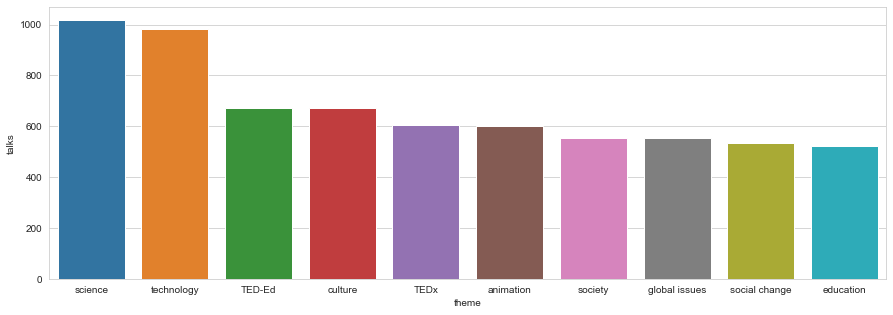

In [123]:
plt.figure(figsize=(15,5))
sns.barplot(x='theme', y='talks', data=pop_themes.head(10))
plt.show()

In [124]:
pop_theme_talks = theme_df[(theme_df['theme'].isin(pop_themes.head(8)['theme'])) & (theme_df['theme'] != 'TEDx')]
pop_theme_talks['year'] = pop_theme_talks['year'].astype('int')
pop_theme_talks = pop_theme_talks[pop_theme_talks['year'] > 2008]

D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


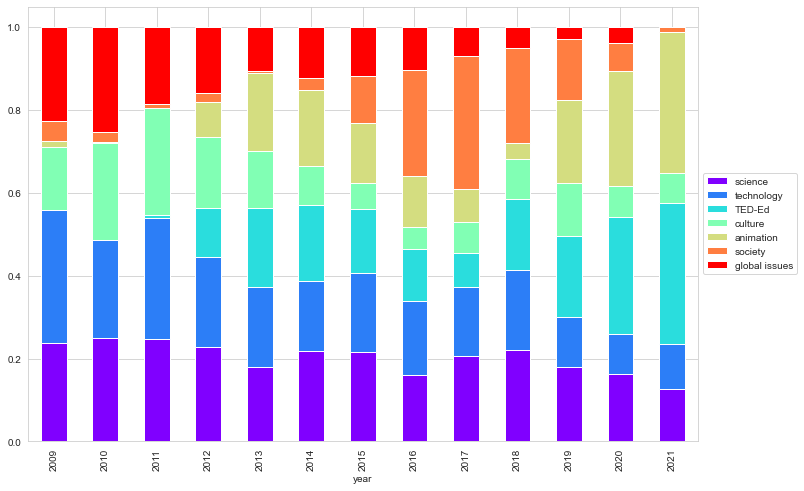

In [125]:
themes = list(pop_themes.head(8)['theme'])
themes.remove('TEDx')
ctab = pd.crosstab([pop_theme_talks['year']], pop_theme_talks['theme']).apply(lambda x: x/x.sum(), axis=1)
ctab[themes].plot(kind='bar', stacked=True, colormap='rainbow', figsize=(12,8)).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

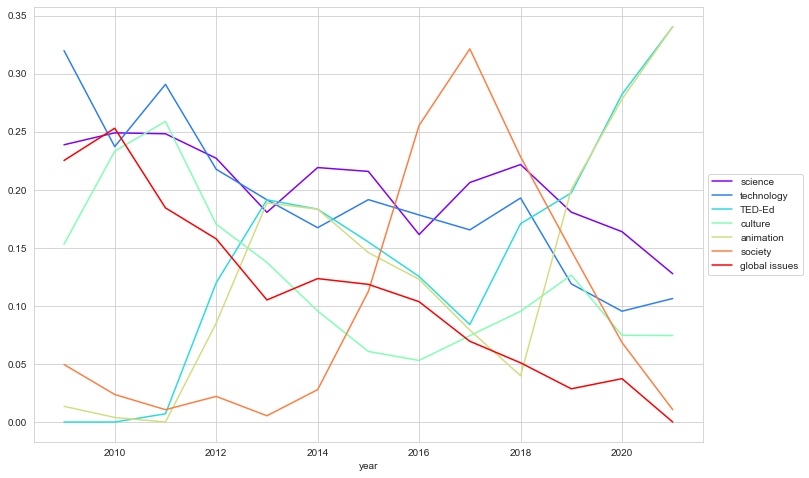

In [126]:
ctab[themes].plot(kind='line', stacked=False, colormap='rainbow', figsize=(12,8)).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

(0.0, 4000000.0)

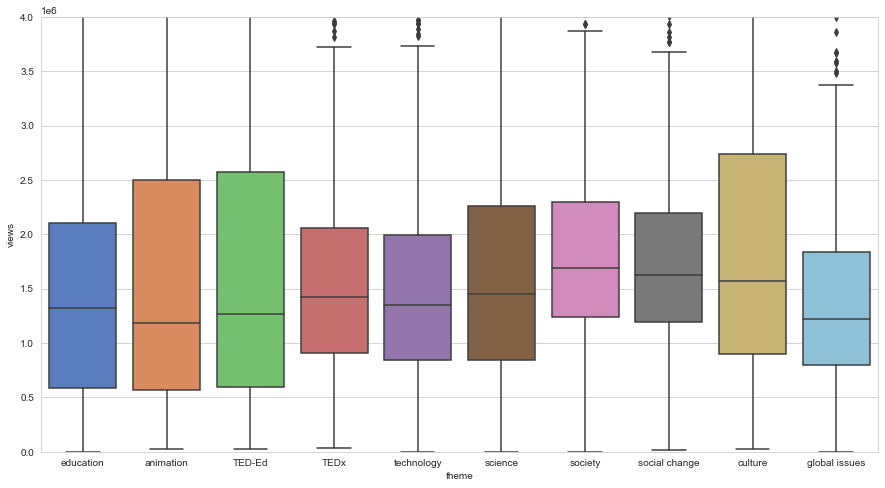

In [127]:
pop_theme_talks = theme_df[theme_df['theme'].isin(pop_themes.head(10)['theme'])]
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='theme', y='views', data=pop_theme_talks, palette="muted", ax =ax)
ax.set_ylim([0, 0.4e7])

In [128]:
#Convert to minutes
df['duration'] = df['duration']/60
df['duration'].describe()

count    4171.000000
mean       11.864589
std         6.310831
min         1.000000
25%         6.100000
50%        11.933333
75%        15.966667
max        66.516667
Name: duration, dtype: float64

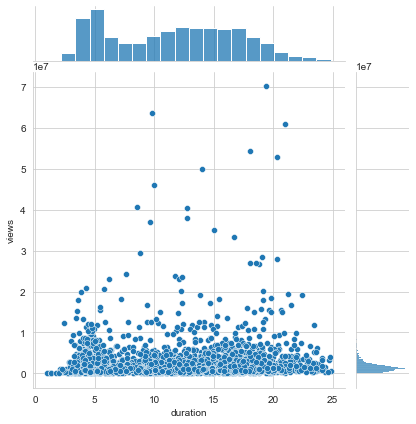

In [132]:
sns.jointplot(x='duration', y='views', data=df[df['duration'] < 25])
plt.xlabel('Duration')
plt.ylabel('Views')
plt.show()

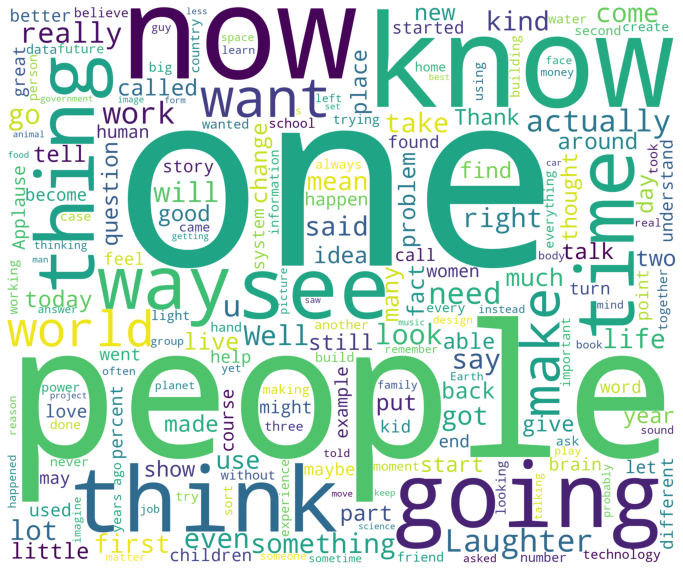

In [137]:
corpus = ' '.join(df['transcript'])
corpus = corpus.replace('.', '. ')
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white',width=2400,height=2000).generate(corpus)
plt.figure(figsize=(12,15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [138]:
from sklearn.feature_extraction.text import CountVectorizer

In [178]:
cv = CountVectorizer(max_df=0.9,min_df=2,stop_words='english')

In [179]:
dtm = cv.fit_transform(data1['transcript'])

In [180]:
dtm

<4298x40723 sparse matrix of type '<class 'numpy.int64'>'
	with 1784737 stored elements in Compressed Sparse Row format>

In [181]:
from sklearn.decomposition import LatentDirichletAllocation

In [182]:
LDA = LatentDirichletAllocation(n_components=10, random_state=42)

In [183]:
LDA.fit(dtm)

LatentDirichletAllocation(random_state=42)

In [184]:
#grab the vocabulary of words
len(cv.get_feature_names())

C:\Users\MIT\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


40723

In [185]:
type(cv.get_feature_names())

list

In [187]:
import random
random_word_id=random.randint(0,40723)
cv.get_feature_names()[random_word_id]

'preferred'

In [188]:
#grab the topics

In [189]:
len(LDA.components_)

10

In [190]:
type(LDA.components_)

numpy.ndarray

In [191]:
LDA.components_.shape

(10, 40723)

In [192]:
LDA.components_

array([[4.16860867e+00, 4.13716007e+02, 1.00000000e-01, ...,
        1.00043639e-01, 7.09998378e+00, 4.31352783e+00],
       [3.26701712e+00, 1.39598219e+02, 1.00000000e-01, ...,
        1.00191122e-01, 1.00001302e-01, 1.00000000e-01],
       [1.00001315e-01, 7.93359253e+01, 1.00020436e-01, ...,
        1.00000000e-01, 1.00000083e-01, 1.00046938e-01],
       ...,
       [2.01939028e+01, 3.80654879e+02, 2.09958653e+00, ...,
        1.00000000e-01, 1.00000000e-01, 1.00048281e-01],
       [1.00004471e-01, 1.17032243e+02, 1.00095298e-01, ...,
        2.09851728e+00, 1.00000000e-01, 1.00014339e-01],
       [1.00027592e-01, 1.85057365e+02, 1.00000000e-01, ...,
        1.00891177e-01, 1.00000000e-01, 1.00000000e-01]])

In [193]:
single_topic= LDA.components_[0]

In [194]:
single_topic.argsort()

array([ 2958, 23392, 38781, ..., 39529, 40288, 26561], dtype=int64)

In [195]:
arr = np.array([10,200,1])

In [196]:
arr

array([ 10, 200,   1])

In [197]:
arr.argsort()

array([2, 0, 1], dtype=int64)

In [198]:
#ARGSORT -----> Index Positions sorted from least to greatest
#Top ten values (10 greatest values)
#Last 10 values of argsort()
single_topic.argsort()[-10:]

array([ 6697,  8691, 27501, 15935, 24451, 40514,  8692, 39529, 40288,
       26561], dtype=int64)

In [199]:
top_ten_words = single_topic.argsort()[-10:]

In [200]:
for index in top_ten_words:
    print(cv.get_feature_names()[index])

china
countries
political
government
new
years
country
war
world
people


In [201]:
#grab the highest probability words per topic

In [202]:
for i,topic in enumerate(LDA.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{i}')
    print([cv.get_feature_names()[index] for index in topic.argsort()[-15:]])
    print('\n')
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['city', 'united', 'states', 'power', 'today', 'china', 'countries', 'political', 'government', 'new', 'years', 'country', 'war', 'world', 'people']




THE TOP 15 WORDS FOR TOPIC #1
['ve', 'years', 'men', 'say', 'time', 'world', 'want', 'said', 'don', 'life', 'think', 'know', 'just', 'women', 'people']




THE TOP 15 WORDS FOR TOPIC #2
['patient', 'human', 'cancer', 'sleep', 'time', 'heart', 'different', 'people', 'disease', 'blood', 'just', 'patients', 'cells', 'body', 'brain']




THE TOP 15 WORDS FOR TOPIC #3
['right', 'want', 'time', 'make', 'world', 'way', 'know', 've', 'things', 'actually', 'going', 'really', 'think', 'just', 'people']




THE TOP 15 WORDS FOR TOPIC #4
['want', 'money', 'world', 'time', 'make', 'don', 've', 'know', 'work', 'percent', 'going', 'think', 'just', 'need', 'people']




THE TOP 15 WORDS FOR TOPIC #5
['earth', 'use', 'planet', 'going', 'carbon', 'ocean', 've', 'need', 'world', 'climate', 'food', 'just', 'years', 'energy', 

In [203]:
topic_results = LDA.transform(dtm)

In [204]:
topic_results[0].round(2)

array([0.22, 0.  , 0.14, 0.  , 0.  , 0.44, 0.  , 0.  , 0.17, 0.03])

In [205]:
topic_results[0].argmax()

5

In [206]:
data1['topic'] = topic_results.argmax(axis=1)

In [207]:
data1

,title,transcript,topic
0,Can you outsmart the apples and oranges fallacy?,Baking apple pie? Discount orange warehouse ha...,5
1,The exploitation of US college athletes,"In college sports, American universities are e...",4
2,How does ultrasound work?,"In a pitch-black cave, bats can’t see much. Bu...",7
3,"An honest history of an ancient and ""nasty"" word","First, a warning. As far as offensive words go...",6
4,The electrical blueprints that orchestrate life,"Chris Anderson: Mike, welcome. It's good to se...",3
...,...,...,...
4437,The best stats you've ever seen,"About 10 years ago, I took on the task to teac...",4
4438,Do schools kill creativity?,Good morning. How are you?(Audience) Good.It's...,6
4439,Greening the ghetto,If you're here today — and I'm very happy that...,4
4440,Simplicity sells,"(Music: ""The Sound of Silence,"" Simon &amp; Ga...",3
